In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex


In [291]:
df =pd.read_csv('diabetes.csv')

In [292]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [294]:
#No null values to work around and everything is a number

In [295]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

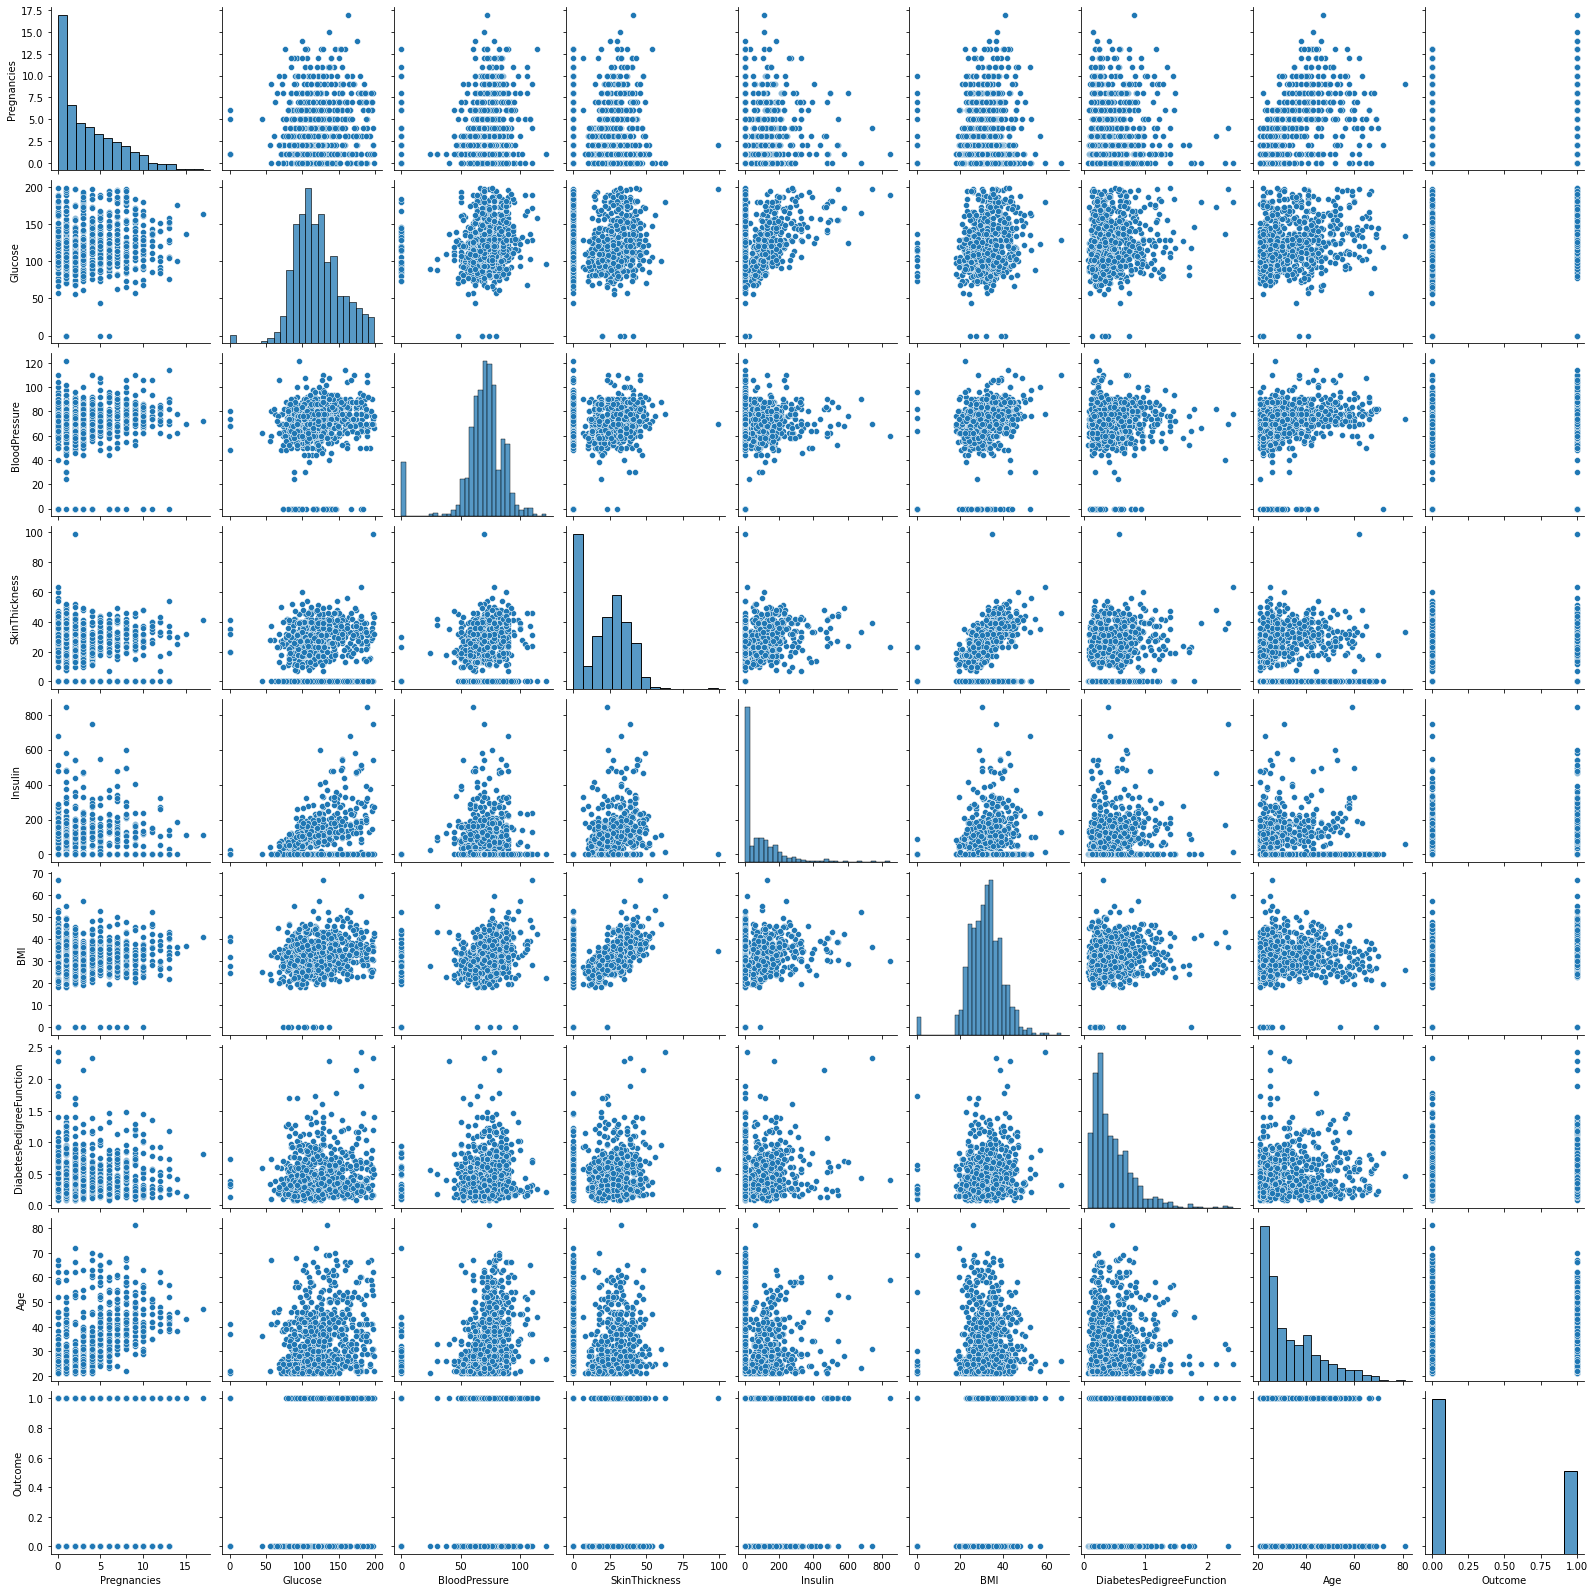

In [296]:
sns.pairplot(df)

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

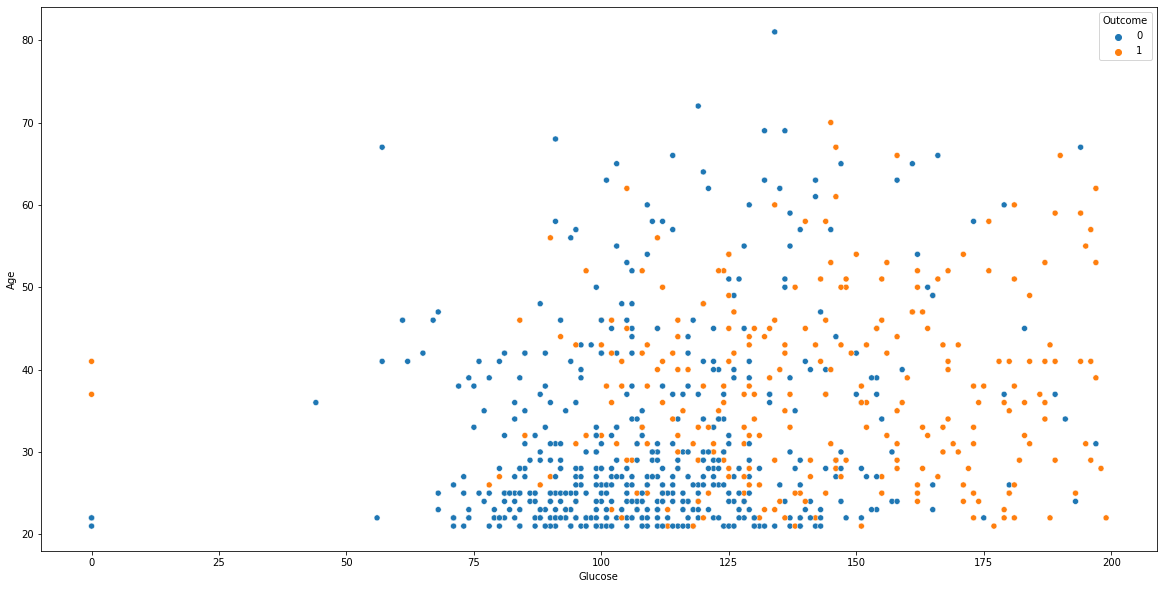

In [297]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = df['Glucose'],y = df['Age'], hue = df['Outcome'])

In [298]:
#The higher the glucose the more likely the patient has diabetes
#The higher the age the more likely the patient has diabetes (There is a large cluster of diabetes free patients below age 30)
#Investigating further below

In [299]:
len(df[(df['Age']>30)&(df['Outcome'] == 1)]) #no. of people who have diabetes above the age of 30

178

In [300]:
len(df[(df['Age']<30)&(df['Outcome'] == 1)]) #no. of people who have diabetes below the age of 30

84

In [301]:
 len(df[(df['Glucose']>75)&(df['Outcome'] == 1)]) - len(df[(df['Glucose']>125)&(df['Outcome'] == 1)])
    #no. of people with diabetes with glucose levels between 75-125

90

In [302]:
len(df[(df['Glucose']>125)&(df['Outcome'] == 1)])

176

<AxesSubplot:>

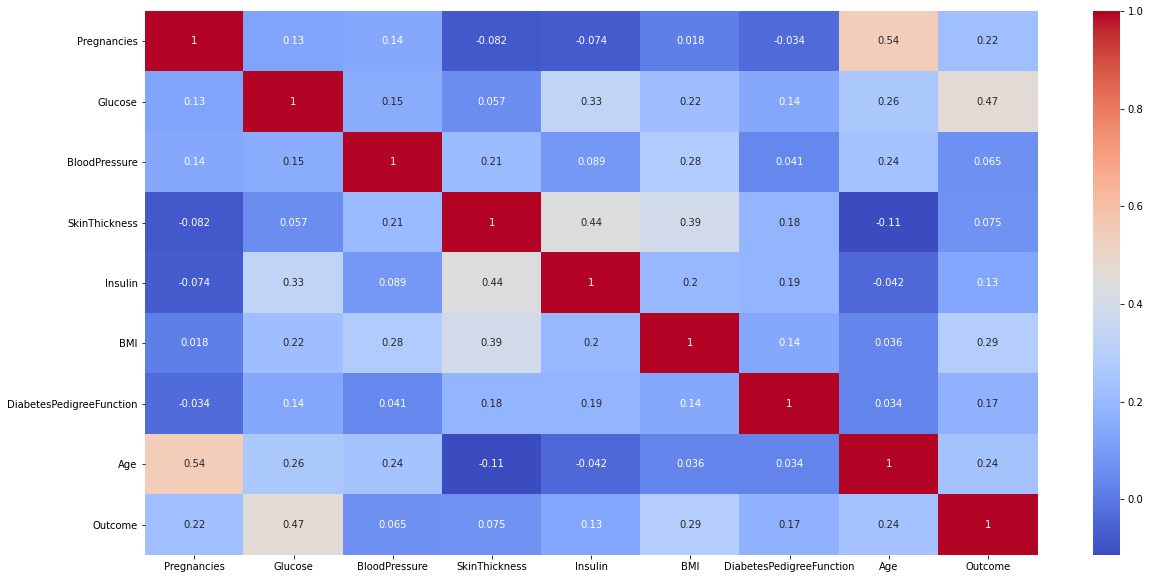

In [303]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

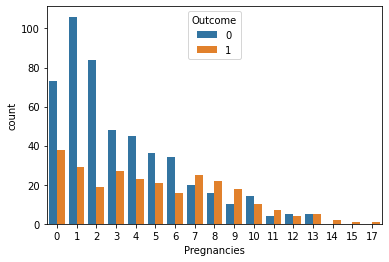

In [304]:
sns.countplot(df['Pregnancies'], hue=df['Outcome']) #the number of positive cases doesnt increase with the number of pregnancies 

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='BMI'>

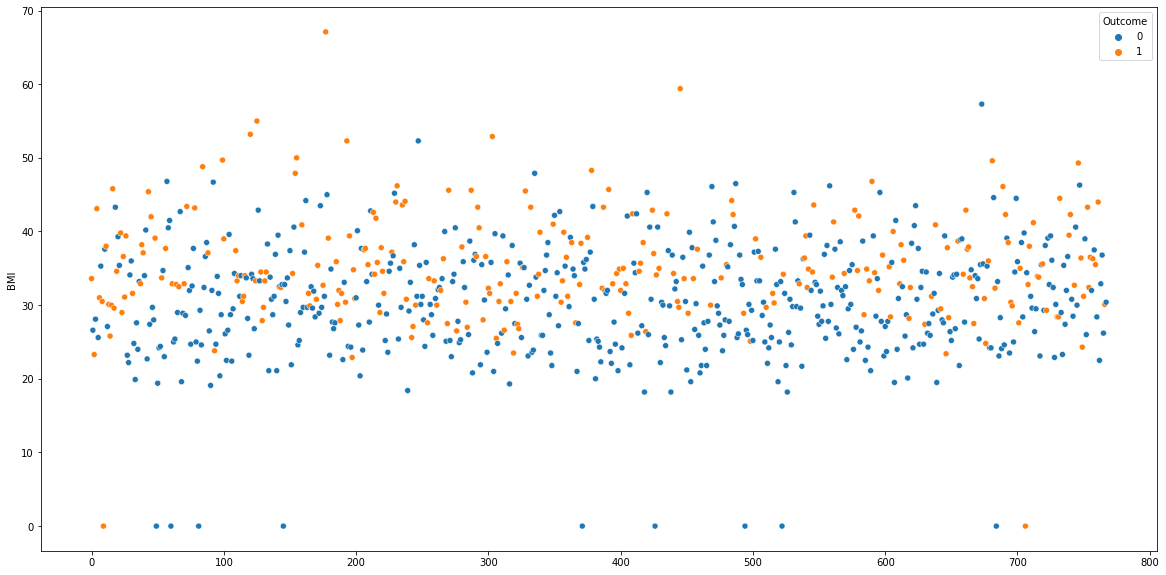

In [305]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.index, df['BMI'], hue =df['Outcome'])

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='BloodPressure'>

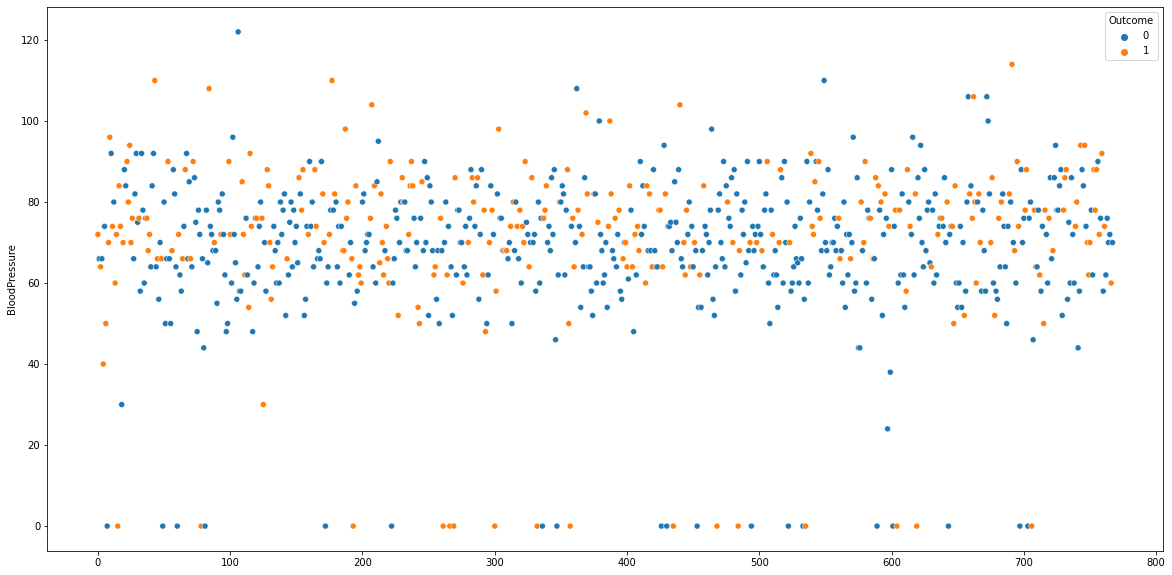

In [306]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.index, df['BloodPressure'], hue =df['Outcome'])

In [307]:
#There are cases with  BMI of 0 which doesnt make sense 
#There are cases of BloodPressure 0 which also dont make sense
#Blood pressure and BMI have almost nothing to do with diabetes as both negative and positive cases are clustered together 
#between 20 to 45 BMI and 50 to 95 BloodPressure
#A BloodPressure or BMI of 0 just means a null values as both conditions are not logically possible

In [308]:
len(df[df['Insulin']>0])/len(df['Insulin'])

0.5130208333333334

<AxesSubplot:ylabel='Insulin'>

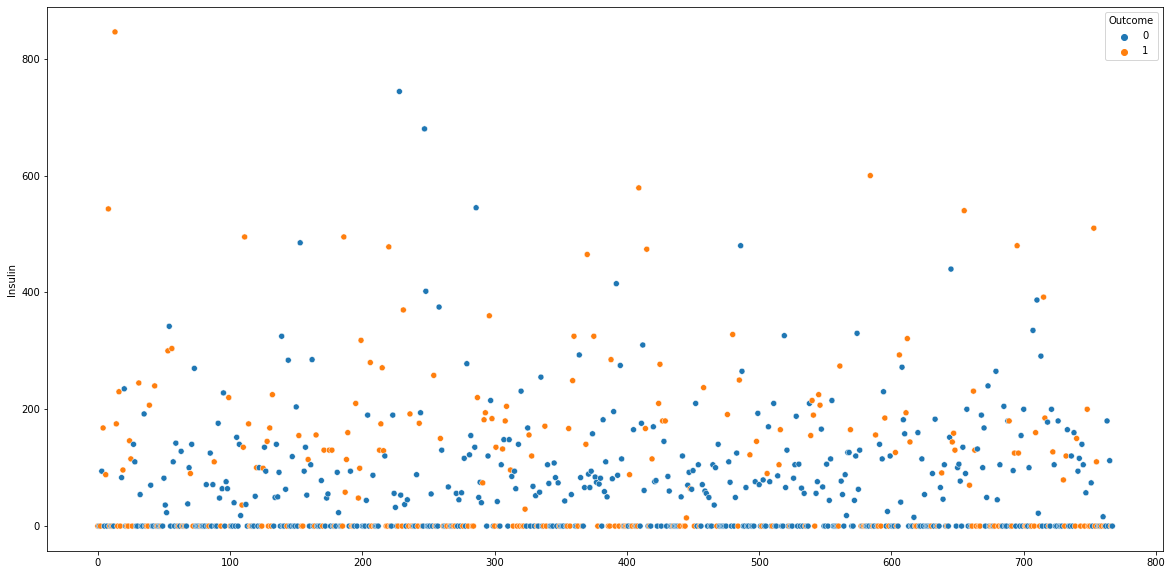

In [309]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = df.index,y = df['Insulin'], hue = df['Outcome'])

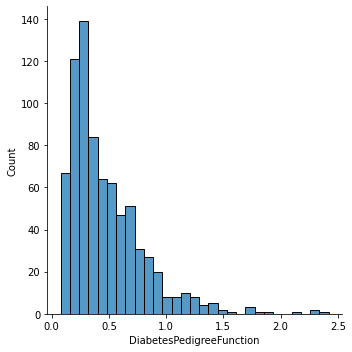

In [310]:
sns.displot(df['DiabetesPedigreeFunction'])

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

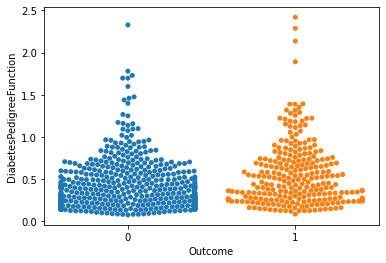

In [311]:
#DiabetesPedigreeFunction is the likely hood of diabetes based on family history
#logically the higher the DiabetesPedigreeFunction value the higher the chances of an Outcome of 1
sns.swarmplot(x = df['Outcome'], y = df['DiabetesPedigreeFunction'])

In [312]:
#The data doesnt agree with logic as both negative and postive outcomes cluster around the same range of DiabetesPedigreeFunction values

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

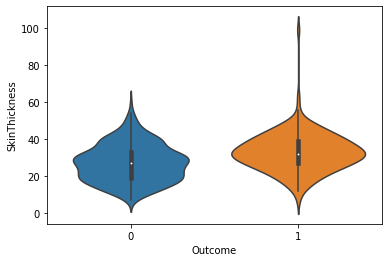

In [313]:
sns.violinplot(x= df['Outcome'], y = df[df['SkinThickness']> 0]['SkinThickness'])

In [314]:
#skin thickness of diabetes patients is a bit higher on average

In [315]:
#using the given features as they are first
features = df.columns[:-1].tolist()
X = df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']]
y = df['Outcome']


In [316]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [317]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train) #training the data



C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [318]:
predict = lr.predict(X_test)

In [319]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       124
           1       0.73      0.56      0.63        68

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



In [320]:
print(confusion_matrix(y_test,predict))

[[110  14]
 [ 30  38]]


In [321]:
#107 true positive, 12 false negatives, 30 False positive, 43 True Negatives
accuracy_score(y_test,predict)

0.7708333333333334

<AxesSubplot:>

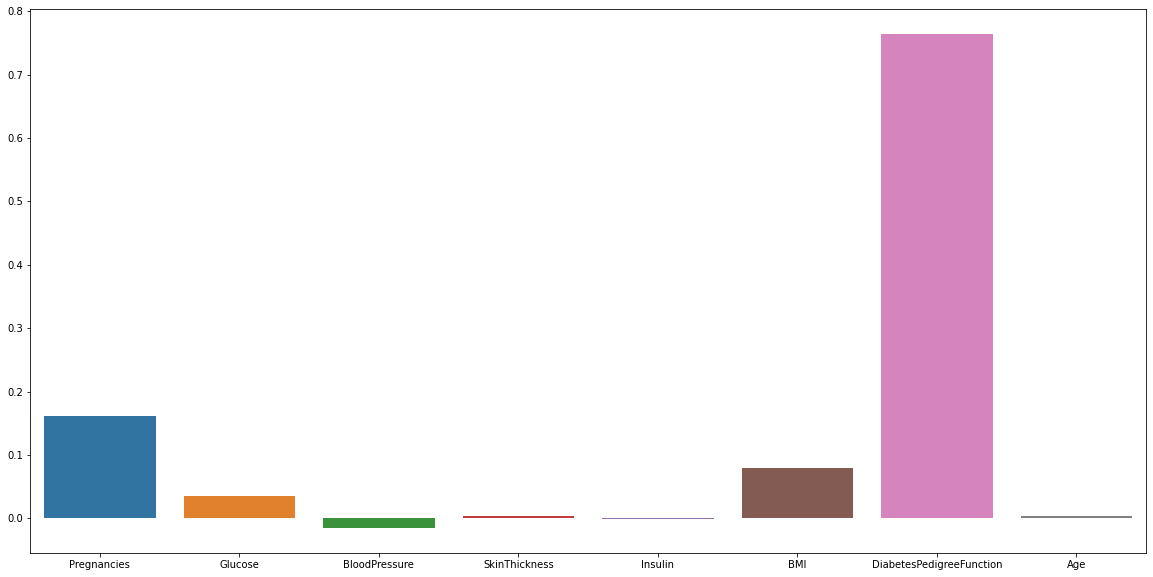

In [322]:
plt.figure(figsize=(20,10))
sns.barplot(x = features, y= list(lr.coef_[0]))

In [323]:
'''interestingly the model relies heavily on DiabetesPedigreeFunction to predict although the correlation between outcome
and glucose was the highest as seen during the EDA'''
#steps to improve accuracy
#I wont be using Insulin and SkinThickness
#Fill up the BloodPressure and BMI columns where BloodPressure/BMI is 0
#I will take the average BMI and BloodPressure based on age group


'interestingly the model relies heavily on DiabetesPedigreeFunction to predict although the correlation between outcome\nand glucose was the highest as seen during the EDA'

In [324]:
df['Age'].describe()
#Range is 21 to 81 (60) so i will bin the Age groups into 6 groups 

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [325]:
cut_age = [0,21,31,41,51,61,71,81]
labels_age = ['21','22-31','32-41','42-51','52-61','62-71','72-81']
df['Age_groups'] = pd.cut(df['Age'], bins = cut_age, labels=labels_age)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
0,6,148,72,35,0,33.6,0.627,50,1,42-51
1,1,85,66,29,0,26.6,0.351,31,0,22-31
2,8,183,64,0,0,23.3,0.672,32,1,32-41
3,1,89,66,23,94,28.1,0.167,21,0,21
4,0,137,40,35,168,43.1,2.288,33,1,32-41
5,5,116,74,0,0,25.6,0.201,30,0,22-31
6,3,78,50,32,88,31.0,0.248,26,1,22-31
7,10,115,0,0,0,35.3,0.134,29,0,22-31
8,2,197,70,45,543,30.5,0.158,53,1,52-61
9,8,125,96,0,0,0.0,0.232,54,1,52-61


In [326]:
df['Age_groups'].value_counts()

22-31    378
32-41    155
42-51     99
21        63
52-61     48
62-71     23
72-81      2
Name: Age_groups, dtype: int64

In [327]:
df[df['Age_groups']=='22-31']['BMI'].mean() #Average BMI of ages 22-31

32.077248677248676

In [328]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
9,8,125,96,0,0,0.0,0.232,54,1,52-61
49,7,105,0,0,0,0.0,0.305,24,0,22-31
60,2,84,0,0,0,0.0,0.304,21,0,21
81,2,74,0,0,0,0.0,0.102,22,0,22-31
145,0,102,75,23,0,0.0,0.572,21,0,21
371,0,118,64,23,89,0.0,1.731,21,0,21
426,0,94,0,0,0,0.0,0.256,25,0,22-31
494,3,80,0,0,0,0.0,0.174,22,0,22-31
522,6,114,0,0,0,0.0,0.189,26,0,22-31
684,5,136,82,0,0,0.0,0.640,69,0,62-71


In [329]:
#knowing the indexes to replace the value in
indexes = [49,81,426,494,522,706]
for value in indexes:
    df.loc[value,'BMI'] = 32.077248677248676
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
9,8,125,96,0,0,0.0,0.232,54,1,52-61
60,2,84,0,0,0,0.0,0.304,21,0,21
145,0,102,75,23,0,0.0,0.572,21,0,21
371,0,118,64,23,89,0.0,1.731,21,0,21
684,5,136,82,0,0,0.0,0.640,69,0,62-71


In [330]:
new_indexes = [60,145,371]
for newvalue in new_indexes:
    df.loc[newvalue,'BMI'] = 27.81746031746032 #df[df['Age_groups']=='21']['BMI'].mean()
df[df['BMI']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
9,8,125,96,0,0,0.0,0.232,54,1,52-61
684,5,136,82,0,0,0.0,0.640,69,0,62-71


In [331]:
df.loc[9,'BMI'] = df[df['Age_groups']=='52-61']['BMI'].mean()
df.loc[684,'BMI'] = df[df['Age_groups']=='62-71']['BMI'].mean()
#all BMI values are added
#time for blood pressure

In [332]:
Indexs = df[(df['BloodPressure']==0)&(df['Age_groups']=='22-31')].index.to_list() #list of all the indexes with BloodPressure 0 and Age_group from 22-31
for index in Indexs:
    df.loc[index,'BloodPressure'] = df[df['Age_groups']=='22-31']['BloodPressure'].mean()
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
15,7,100,0.0,0,0,30.00000,0.484,32,1,32-41
60,2,84,0.0,0,0,27.81746,0.304,21,0,21
193,11,135,0.0,0,0,52.30000,0.578,40,1,32-41
222,7,119,0.0,0,0,25.20000,0.209,37,0,32-41
332,1,180,0.0,0,0,43.30000,0.282,41,1,32-41
336,0,117,0.0,0,0,33.80000,0.932,44,0,42-51
357,13,129,0.0,30,0,39.90000,0.569,44,1,42-51
453,2,119,0.0,0,0,19.60000,0.832,72,0,72-81
468,8,120,0.0,0,0,30.00000,0.183,38,1,32-41
604,4,183,0.0,0,0,28.40000,0.212,36,1,32-41


In [333]:
#repeating the same process again for the other age groups
Indexs1 = df[(df['BloodPressure']==0)&(df['Age_groups']=='32-41')].index.to_list()
for index1 in Indexs1:
    df.loc[index1,'BloodPressure'] = df[df['Age_groups']=='32-41']['BloodPressure'].mean()
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups
60,2,84,0.0,0,0,27.81746,0.304,21,0,21
336,0,117,0.0,0,0,33.80000,0.932,44,0,42-51
357,13,129,0.0,30,0,39.90000,0.569,44,1,42-51
453,2,119,0.0,0,0,19.60000,0.832,72,0,72-81


In [334]:
df.loc[60,'BloodPressure'] = df[df['Age_groups']=='21']['BloodPressure'].mean()
df.loc[336,'BloodPressure'] = df[df['Age_groups']=='42-51']['BloodPressure'].mean()
df.loc[357,'BloodPressure'] = df[df['Age_groups']=='42-51']['BloodPressure'].mean()
df.loc[453,'BloodPressure'] = df[df['Age_groups']=='72-81']['BloodPressure'].mean()
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_groups


In [335]:
#No 0 values in Glucose, Blood Pressure,BMI,DiabetesPedigreeFunction



<AxesSubplot:>

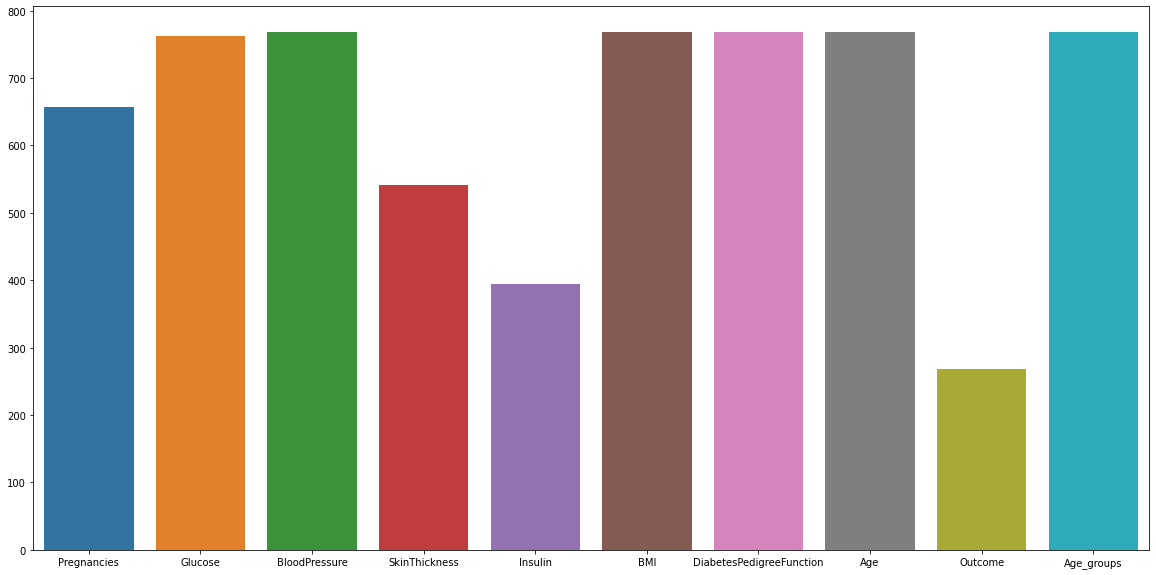

In [336]:
plt.figure(figsize=(20,10))
sns.barplot(x= df.columns.tolist(), y = df.astype(bool).sum(axis=0).to_list())

In [352]:
#time to remodel the data and hopefully get a better accuracy 
print(features)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [353]:
X_test,X_train,y_test,y_train = train_test_split(X,y)

In [354]:
lr.fit(X_train,y_train)

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
predict = lr.predict(X_test)

In [356]:
#fingers crossed
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.80      0.85      0.83       381
           1       0.67      0.59      0.63       195

    accuracy                           0.77       576
   macro avg       0.74      0.72      0.73       576
weighted avg       0.76      0.77      0.76       576



In [357]:
accuracy_score(y_test,predict)

0.765625

In [358]:
#ok so that didnt work and the accuracy decreased to 76.5% from 77% (almost the same)
#investigating importance once more

<AxesSubplot:>

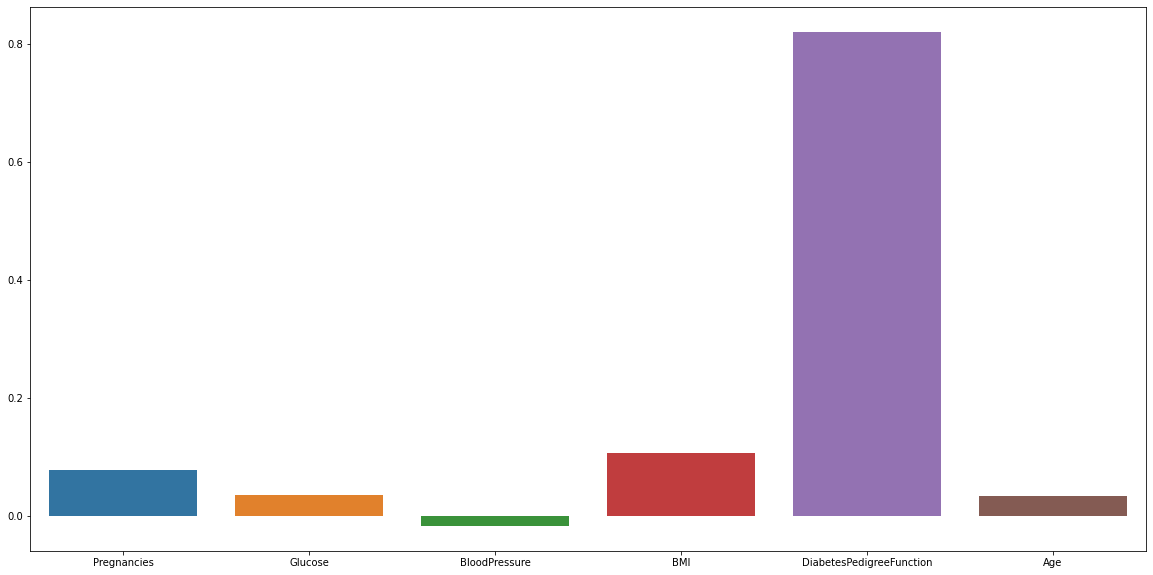

In [359]:
plt.figure(figsize=(20,10))
sns.barplot(x = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], y = lr.coef_[0])

In [ ]:
'''The model just loves DiabetesPedigreeFunction, reliance on DiabetesPedigreeFunction has increased while reliance 
on BloodPressure and BMI remains relatively similar'''